<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recommender-Model-for-Users-with-Movies-Dataset" data-toc-modified-id="Recommender-Model-for-Users-with-Movies-Dataset-1">Recommender Model for Users with Movies Dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1">Importing Libraries</a></span></li></ul></li><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-2">Data Import</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3">Data Analysis</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Calculate-Score-using-IMDB-Weighted-Ratings" data-toc-modified-id="Calculate-Score-using-IMDB-Weighted-Ratings-4.1">Calculate Score using IMDB Weighted Ratings</a></span></li><li><span><a href="#Movies-vs-Runtime" data-toc-modified-id="Movies-vs-Runtime-4.2">Movies vs Runtime</a></span></li><li><span><a href="#Word-cloud" data-toc-modified-id="Word-cloud-4.3">Word cloud</a></span></li><li><span><a href="#Top-movies-vs-Top-Users" data-toc-modified-id="Top-movies-vs-Top-Users-4.4">Top movies vs Top Users</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-4.5">Distributions</a></span></li></ul></li><li><span><a href="#Content-Based-Filtering" data-toc-modified-id="Content-Based-Filtering-5">Content Based Filtering</a></span></li><li><span><a href="#Collaborative-filtering" data-toc-modified-id="Collaborative-filtering-6">Collaborative filtering</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Item-Based" data-toc-modified-id="Item-Based-6.0.0.1">Item Based</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Recommender Model for Users with Movies Dataset

Movie Dataset files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The
dataset consists of movies released on or before July 2017. Data points include cast, crew, plot
keywords, budget, revenue, posters, release dates, languages, production companies,countries, TMDB vote counts and vote averages.This dataset also has files containing 26 million ratings from 270,000 users for all 45,000
movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

In this project, we will build a recommendation system that can recommend movies to the users.

## Importing Libraries

In [1]:
import pandas as pd
pd.options.display.max_columns= None
import seaborn as sns
sns.set( palette="inferno")
import numpy as np
import matplotlib.pyplot as plt

# Data Import

The Movies dataset contains 7 csv files and here we will import 5 of them.

In [2]:
credits=pd.read_csv('credits.csv')
movies_metadata=pd.read_csv('movies_metadata.csv')
keywords=pd.read_csv('keywords.csv')
ratings=pd.read_csv('ratings.csv')
ratings_small = pd.read_csv("ratings_small.csv", parse_dates=['timestamp'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Analysis

In [3]:
movies_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [4]:
keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [5]:
credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [6]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


Let's merge these credits , keywords to movies_metadata.
before that , we need to convert 'id' column to int and remove inappropriate values from that column

In [7]:
movies_metadata=movies_metadata[movies_metadata['id'] !='1997-08-20']
movies_metadata=movies_metadata[movies_metadata['id'] !='2012-09-29']
movies_metadata=movies_metadata[movies_metadata['id'] !='2014-01-01']
movies_metadata['id']=movies_metadata['id'].astype('int64')

In [8]:
movies_metadata=pd.merge(movies_metadata, credits, on='id')

In [9]:
movies_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [10]:
movies_metadata=pd.merge(movies_metadata, keywords, on='id')

In [11]:
movies_metadata.shape

(46628, 27)

Finally we have 27 columns all together in this file.

# Exploratory Data Analysis

## Calculate Score using IMDB Weighted Ratings 
For this, we can use IMDB's Weighted ratings formula to predict score of the movies using their vote count .


<img src="formula.png">

In [12]:
c=movies_metadata['vote_average'].mean()
c

5.611727865476706

We can see average rating is 5.6 .For movie to be featured in the top list, it must have votes than at least 90% of the movies in the list.Let's find out the Quantile 0.9.

In [13]:
m=movies_metadata['vote_count'].quantile(0.9)
m

156.0

Using this rating , we can filter out the movies only lying in segment.

In [14]:
movies_with_score= movies_metadata.copy().loc[movies_metadata['vote_count'] >= m ]
movies_with_score.shape

(4680, 27)

So we have 4680 movies that have been counted the most number of times.

In [15]:
def weighted_rating(x, m=m, C=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
movies_with_score['weighted_rating'] = movies_with_score.apply(weighted_rating, axis=1)

In [16]:
movies_with_score = movies_with_score.sort_values('weighted_rating', ascending=False)
movies_with_score[['title', 'vote_count', 'vote_average', 'weighted_rating']].head(10)

,title,vote_count,vote_average,weighted_rating
314,The Shawshank Redemption,8358.0,8.5,8.447079
10397,Dilwale Dulhania Le Jayenge,661.0,9.1,8.433941
841,The Godfather,6024.0,8.5,8.427092
12589,The Dark Knight,12269.0,8.3,8.266248
2870,Fight Club,9678.0,8.3,8.257355
292,Pulp Fiction,8670.0,8.3,8.252485
522,Schindler's List,4436.0,8.3,8.208674
23868,Whiplash,4376.0,8.3,8.207465
5529,Spirited Away,3968.0,8.3,8.198310
2231,Life Is Beautiful,3643.0,8.3,8.189610


These are the TOP 10 movies that are popular in terms of vote count and hence their Ratings matter .

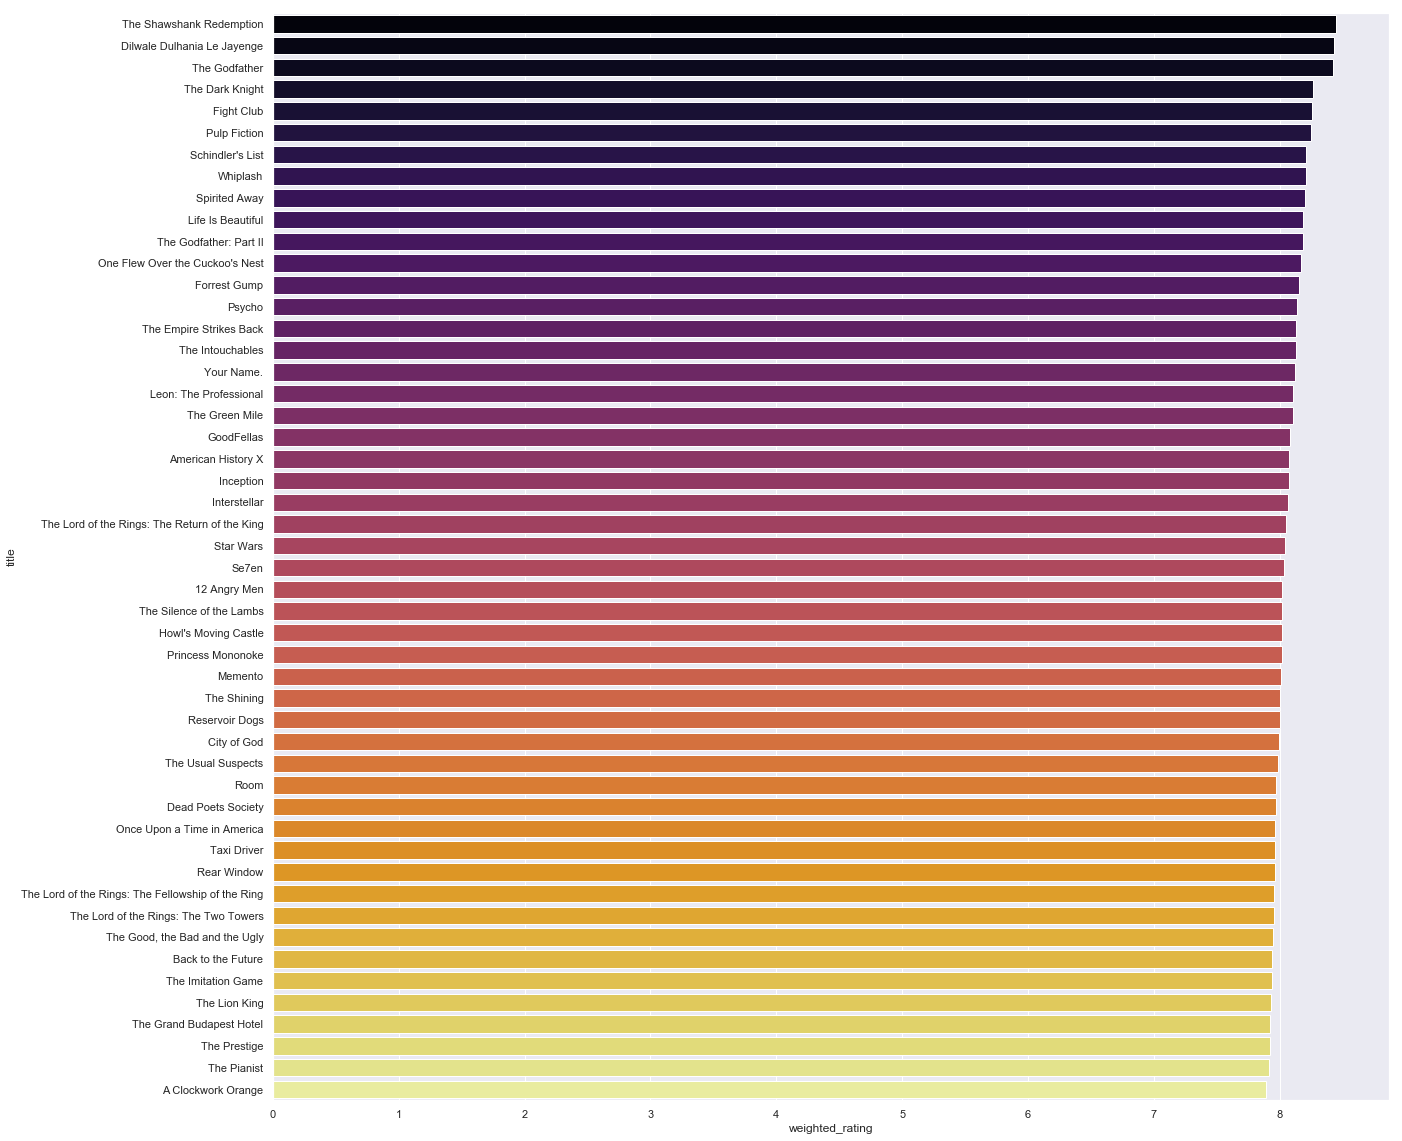

In [17]:
plt.figure(figsize=(20,20))
sns.barplot(y='title', x = 'weighted_rating', data=movies_with_score.head(50), palette="inferno")

## Movies vs Runtime

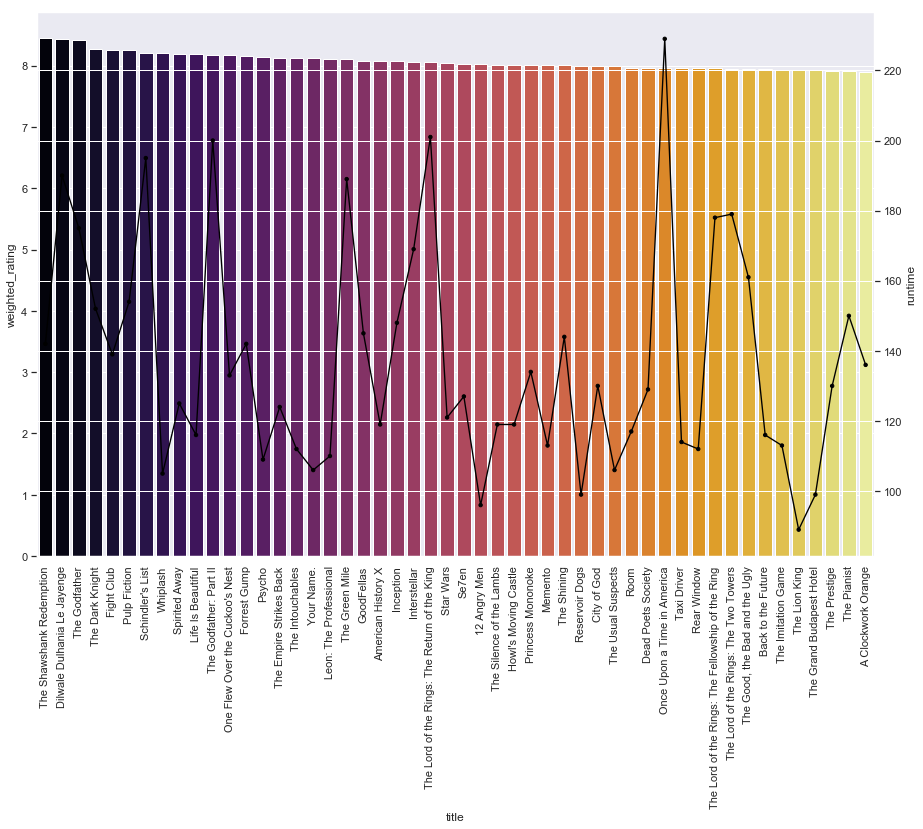

In [18]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='weighted_rating',  data=movies_with_score.head(50),palette="inferno")
gt = g1.twinx()
gt = sns.pointplot(x='title', y='runtime', data=movies_with_score.head(50), color='black', legend=False, ci=70, scale=0.5)
plt.show()

No handles with labels found to put in legend.


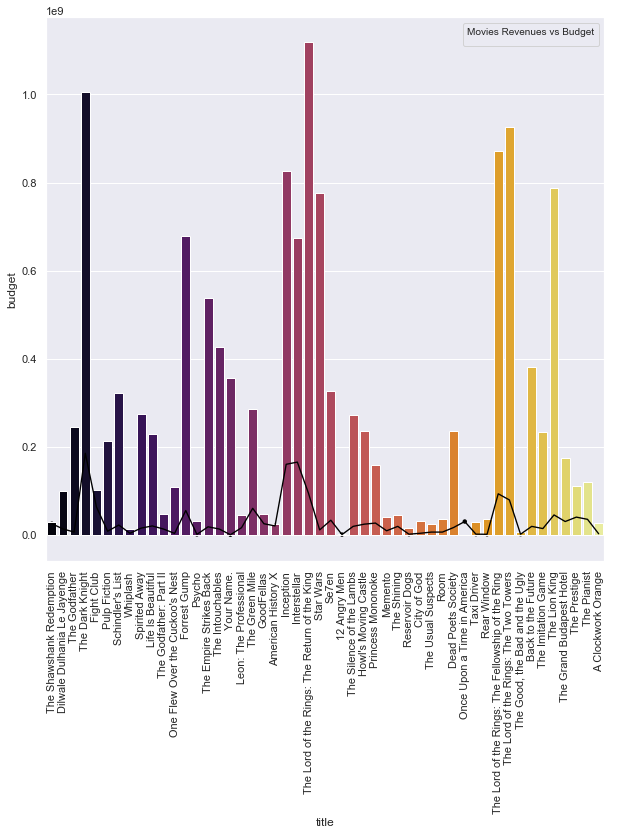

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y=movies_with_score['revenue'].astype(float),  data=movies_with_score.head(50), palette="inferno")
plt.legend(title='Movies Revenues vs Budget')
gt = sns.pointplot(x='title', y=movies_with_score['budget'].astype(float), data=movies_with_score.head(50), color='black', legend=False, ci=70, scale=0.5)
plt.show()

## Word cloud

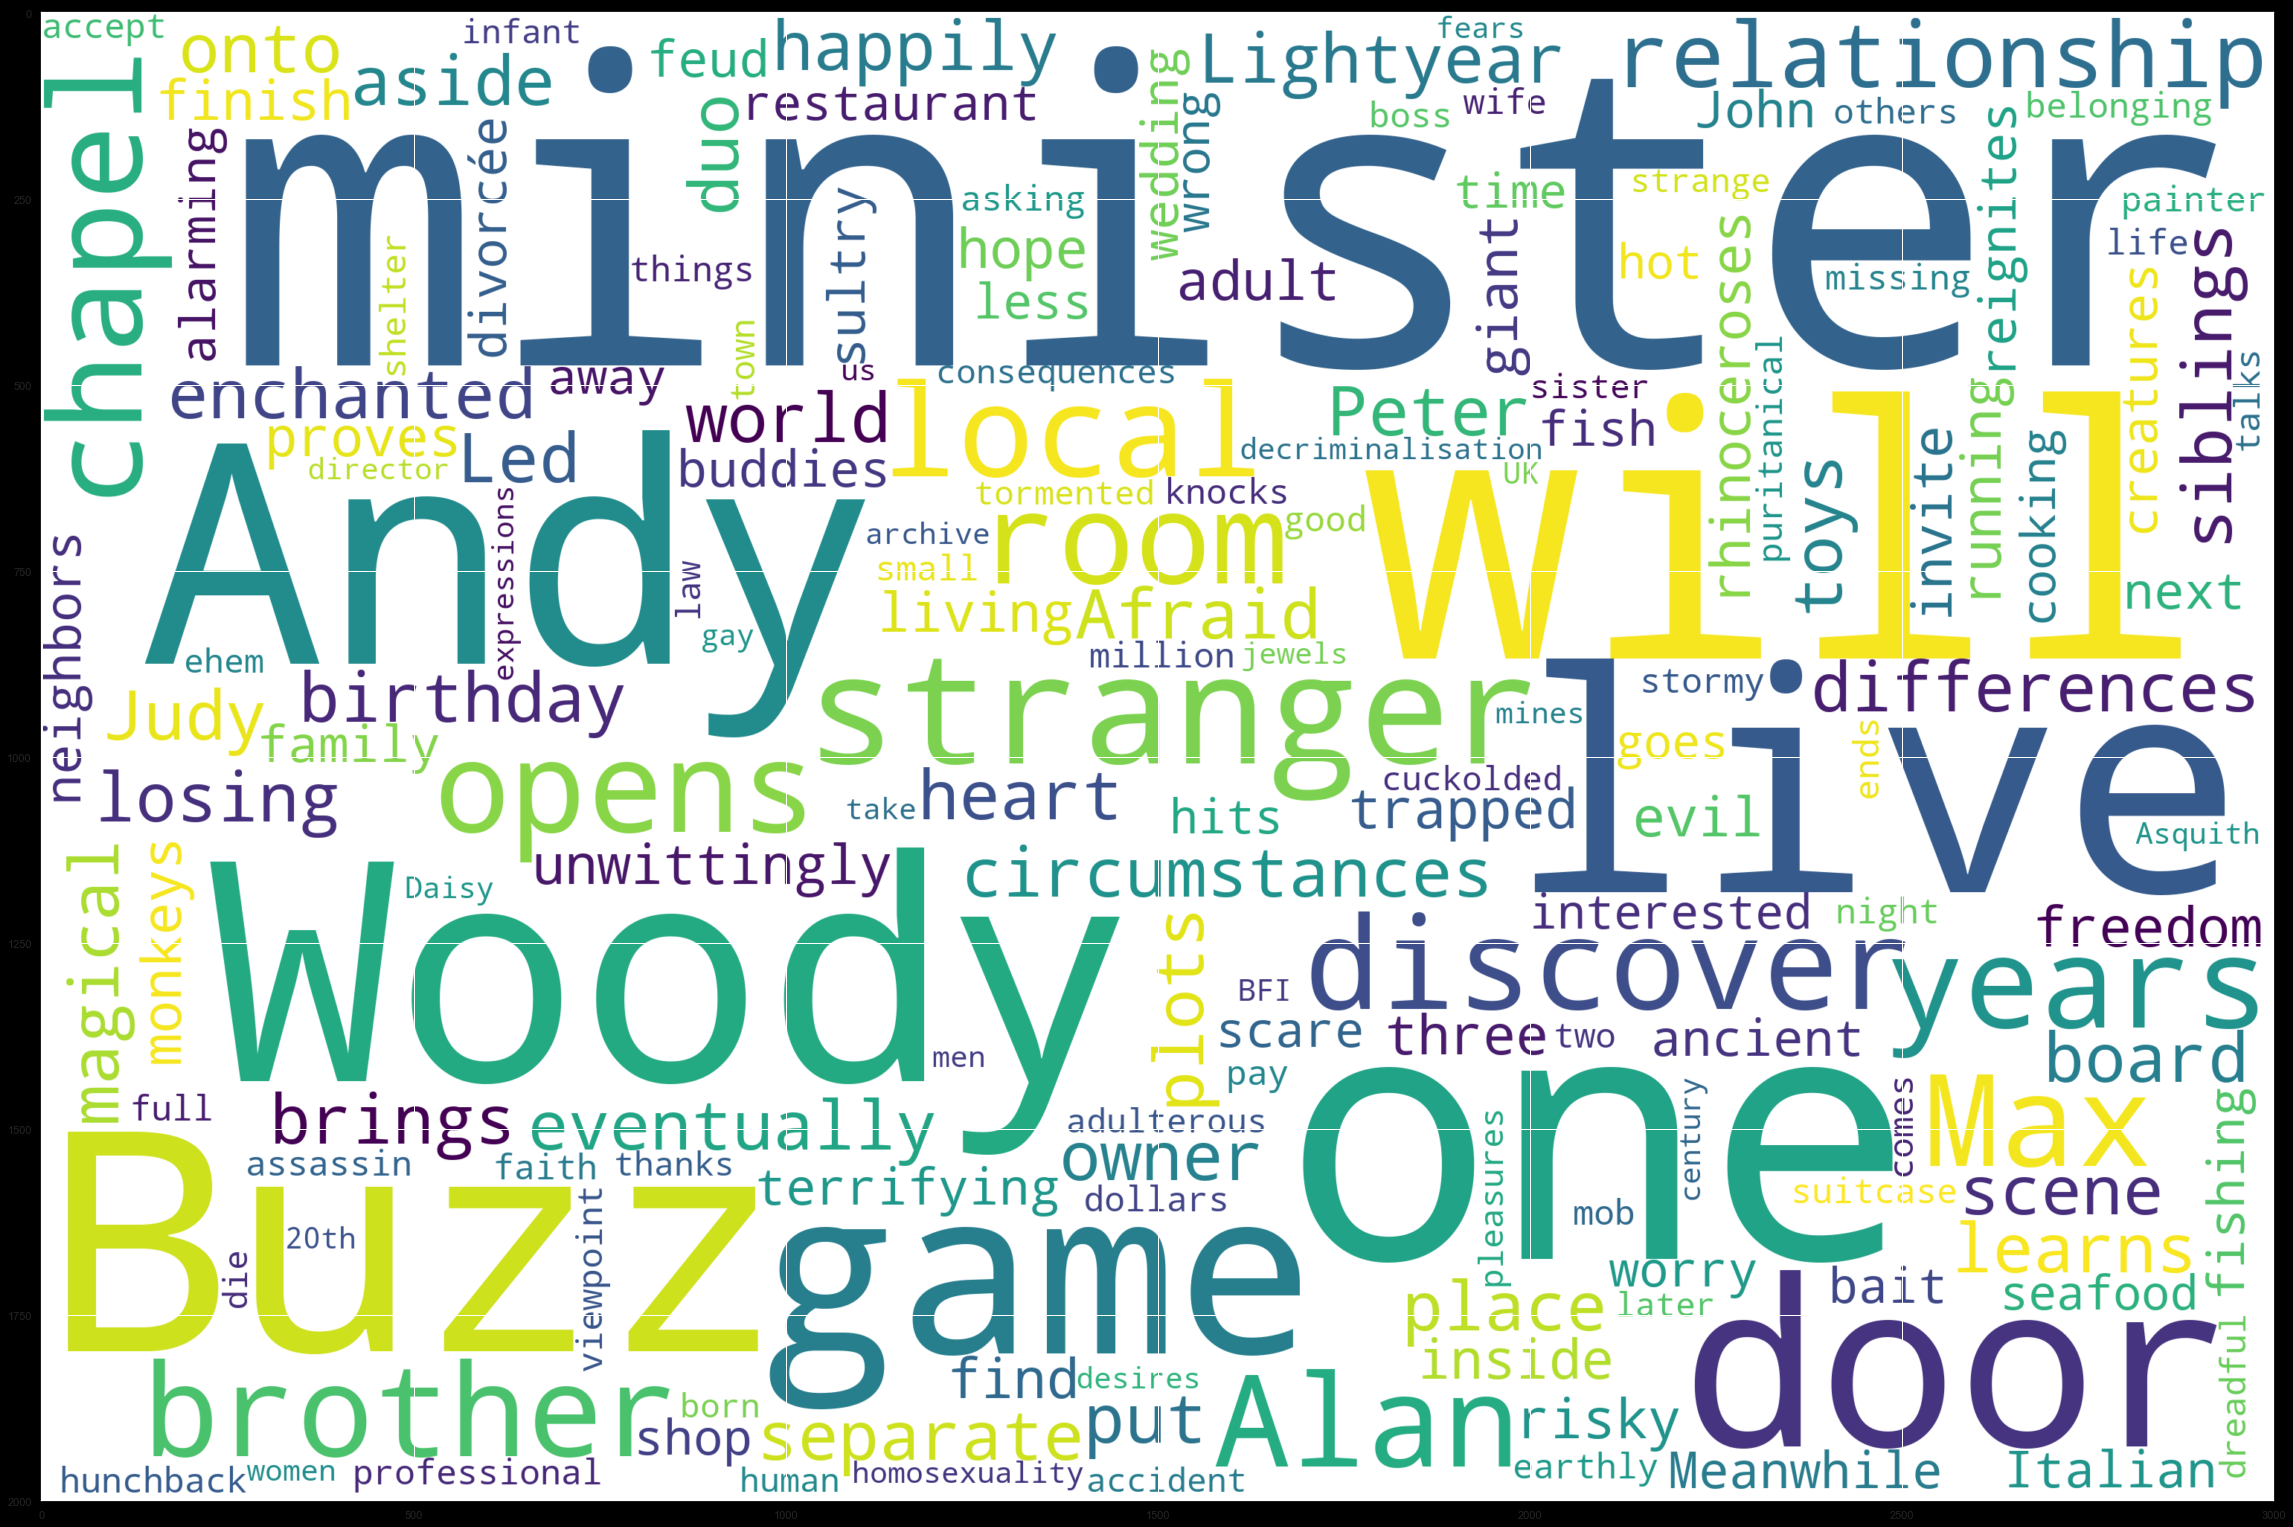

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = movies_metadata['overview'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
plt.show()

## Top movies vs Top Users

In [21]:
grpbyUser=ratings.groupby('userId')['rating'].count().sort_values(ascending=False).nlargest(20)
grpbyMovie=ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).nlargest(20)

In [22]:
grpbyUser

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
230417     5619
70648      5356
194690     5206
107720     5169
24025      4946
165352     4921
243331     4834
101276     4834
74275      4815
41190      4785
Name: rating, dtype: int64

In [23]:
grpbyMovie

movieId
356     91921
318     91082
296     87901
593     84078
2571    77960
260     77045
480     74355
527     67662
110     66512
1       66008
1210    62714
589     61836
1196    61672
2959    60024
1198    59693
50      59271
2858    57879
150     57416
780     57232
858     57070
Name: rating, dtype: int64

In [24]:
topusers = ratings.join(grpbyUser, rsuffix='_r', how='inner', on='userId')
topmovies = topusers.join(grpbyMovie, rsuffix='_r', how='inner', on='movieId')
pd.crosstab(topusers.userId, topmovies.movieId, topusers.rating, aggfunc=np.sum)

movieId,1,50,110,150,260,296,318,356,480,527,589,593,780,858,1196,1198,1210,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,,,
8659,4.0,4.5,5.0,4.0,4.0,4.5,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0
24025,3.0,5.0,4.0,3.5,2.5,5.0,4.5,3.5,4.5,5.0,4.5,4.0,NaN,5.0,1.5,4.5,2.0,4.5,4.5,4.5
41190,4.5,3.5,NaN,4.0,3.5,4.5,NaN,NaN,NaN,4.0,4.0,4.0,2.5,4.5,NaN,4.5,NaN,3.5,2.5,4.0
45811,4.0,4.0,3.5,3.5,4.0,4.5,4.5,3.5,4.0,4.5,4.0,4.0,3.0,4.5,4.0,4.0,4.0,4.0,4.0,3.5
70648,4.0,4.0,4.0,3.5,4.0,4.5,4.0,3.5,4.0,4.0,4.0,4.5,3.0,3.5,4.0,4.0,4.0,4.0,5.0,4.5
74275,NaN,4.0,3.5,4.0,5.0,3.5,4.5,4.0,3.0,4.0,3.0,4.0,3.5,3.0,4.5,4.0,4.5,2.5,4.0,3.0
98415,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,3.0,5.0,2.5,4.0,3.0,4.0,4.0,2.0
98787,4.0,4.0,4.0,3.0,3.0,5.0,5.0,2.0,2.5,3.5,5.0,4.0,3.5,5.0,5.0,5.0,3.0,4.0,5.0,1.0
101276,2.5,2.5,2.5,1.5,3.5,3.0,1.0,1.0,2.0,NaN,3.0,3.0,1.5,4.0,3.5,3.0,3.0,2.5,1.5,1.5


## Distributions

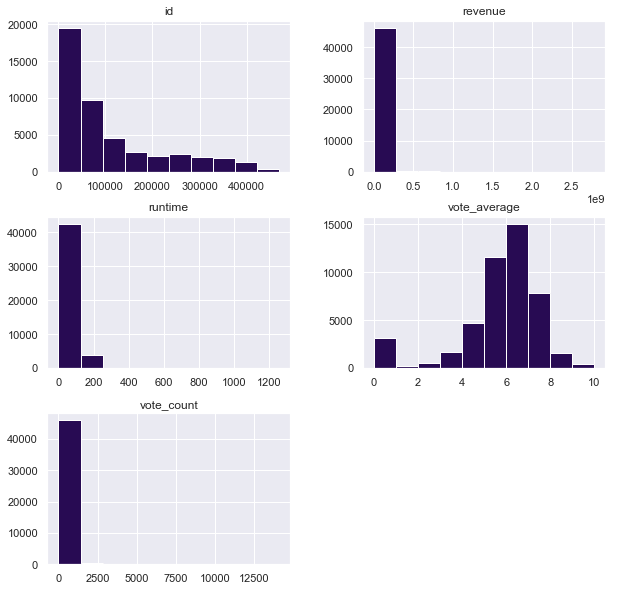

In [25]:
movies_metadata.hist(figsize=(10,10))
plt.show()

# Content Based Filtering

We can use similarity score , genres to find similar movies and Hence Movies can be recommended .
Let's use 'Overview' Column for this first.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies_metadata['overview'] = movies_metadata['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies_metadata['overview'])
tfidf_matrix.shape

(46628, 75827)

We see that over 75000 words were used to describe approx 46000 movies in this data.Using this, we can create similarity score  such as eulicdean or Pearson and Cosine .We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows

<img src="cosine.png">

Using sklearn linear_kernel, we can find dotproduct of tfidf matrix to calculate cosine similarity


In [27]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

To find similar movies, we will define a function that is using movie input and recommending similar movies.
Lets create index for our dataframe before proceding further.
Find similar movies using cosine function , created in above step
sort the values , pick only TOP 10, 

In [28]:
movies_index = pd.Series(movies_metadata.index, index=movies_metadata['title']).drop_duplicates()
def recommend_similar_movies(title, cosine_sim=cosine_sim):
    idx = movies_index[title]
    scores = list(enumerate(cosine_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    df = [i[0] for i in scores]
    return movies_metadata['title'].iloc[df]


In [29]:
recommend_similar_movies('The Godfather')

1199               The Godfather: Part II
45195    The Godfather Trilogy: 1972-1990
1934              The Godfather: Part III
23322                          Blood Ties
11399                    Household Saints
34932                   Start Liquidation
10916                            Election
39199            A Mother Should Be Loved
17919                   Short Sharp Shock
26508                  Beck 28 - Familjen
Name: title, dtype: object

# Collaborative filtering

#### Item Based 

In [30]:
ratings_small.columns = ['userId', 'id','rating','timestamp']
movie = movies_metadata[['id', 'title', 'genres']]
movie.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
movie.head()

,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [32]:
newdf = ratings_small.pivot(index = 'userId', columns='id', values='rating').fillna(0)
df=newdf.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
mean_ratings=np.mean(df, axis = 1)
updated_df = df - mean_ratings.reshape(-1, 1)

In [34]:
from scipy.sparse.linalg import svds
U, s, Vt = svds(updated_df, k = 50)
s = np.diag(s)
all_mean_ratings = np.dot(np.dot(U, s), Vt) + mean_ratings.reshape(-1, 1)
latest_df = pd.DataFrame(all_mean_ratings, columns = newdf.columns)

In [35]:
user_row_number=7
sorted_user_predictions=latest_df.iloc[user_row_number].sort_values(ascending=False)

In [36]:
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
id           100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [37]:
user_data=ratings_small[ratings_small['userId'] == 8]

In [38]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 583 to 698
Data columns (total 4 columns):
userId       116 non-null int64
id           116 non-null int64
rating       116 non-null float64
timestamp    116 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 4.5+ KB


In [39]:
movie['id']=movie['id'].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
user_full = user_data.merge(movie, how = 'left', left_on = 'id', right_on = 'id')

In [41]:
def recommend_movies(predictions_df, userId, movies_df, original_ratings_df, num_recommendations=5):
    user_row_number = userId - 1 
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    user_data = original_ratings_df[original_ratings_df.userId == (userId)]
    user_full = (user_data.merge(movie, how = 'left', left_on = 'id', right_on = 'id').
                     sort_values(['rating'], ascending=False))
    print ('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    recommendations = (movie[~movie['id'].isin(user_full['id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'id',
               right_on = 'id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(latest_df, 8, movie, ratings_small, 5)

User 8 has already rated 116 movies.
Recommending the highest 5 predicted ratings movies not already rated.


In [42]:
already_rated.head()

,userId,id,rating,timestamp,title,genres
0,8,32,5.0,1154465405,NaN,NaN
13,8,527,5.0,1154400170,Once Were Warriors,"[{'id': 18, 'name': 'Drama'}]"
42,8,1777,5.0,1154400458,Fahrenheit 9/11,[]
44,8,1961,5.0,1154473322,My Name Is Bruce,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam..."
51,8,2329,5.0,1154473217,NaN,NaN


In [43]:
predictions

,id,title,genres
6443,8961,Bad Boys II,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
5525,1682,Mothra vs. Godzilla,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n..."
4238,1089,Point Break,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
12055,1721,All the Way Boys,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
12290,2268,The Golden Compass,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
